
### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**:

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

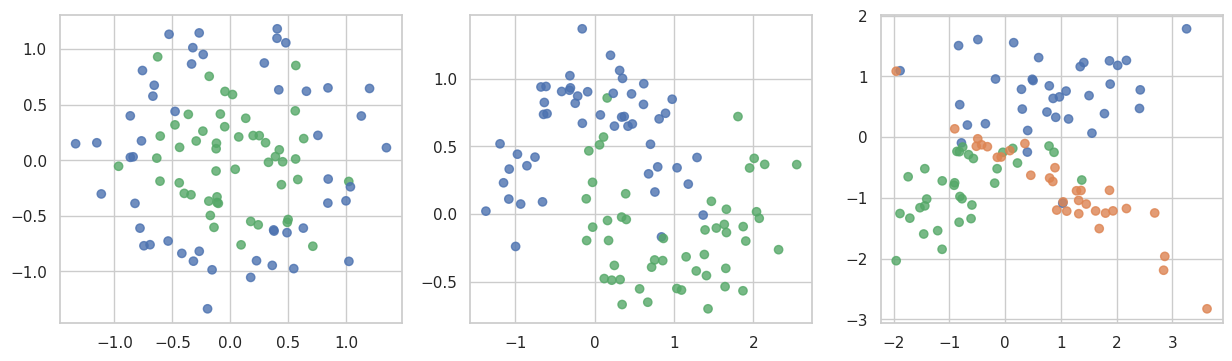

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )

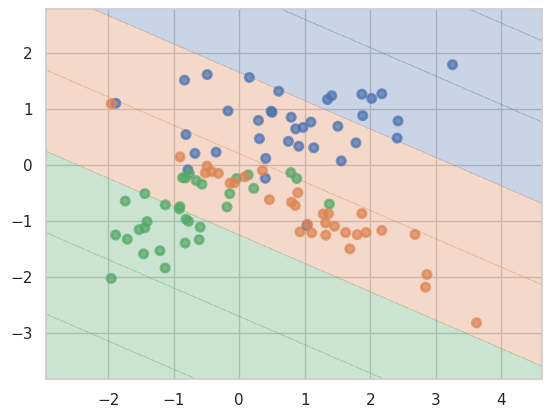

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset 1:
Train accuracy: 1.000
Test accuracy: 0.700


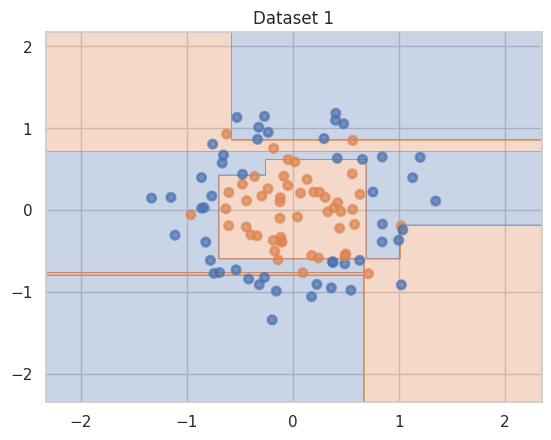

Dataset 2:
Train accuracy: 1.000
Test accuracy: 0.950


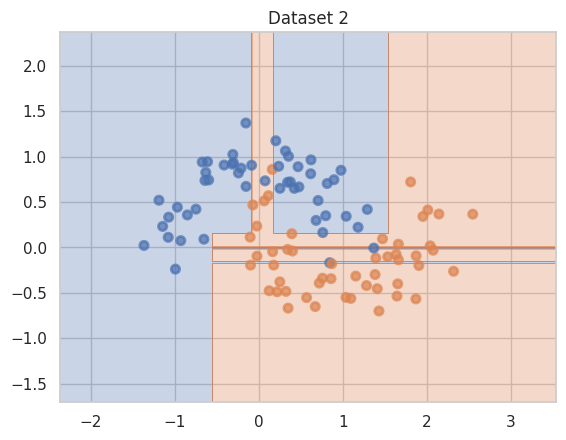

Dataset 3:
Train accuracy: 1.000
Test accuracy: 0.700


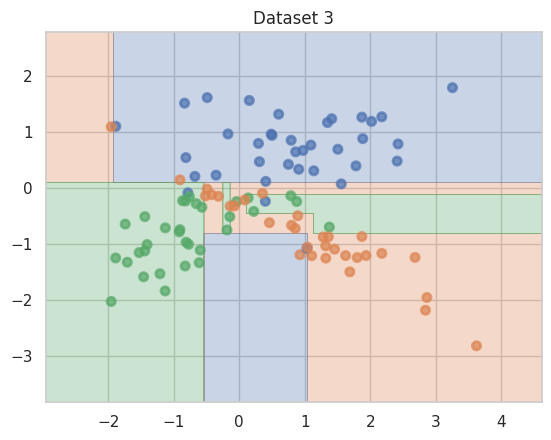

In [7]:
from sklearn.metrics import accuracy_score

for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred_train = tree.predict(X_train)
    y_pred_test = tree.predict(X_test)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    print(f"Dataset {i+1}:")
    print(f"Train accuracy: {train_accuracy:.3f}")
    print(f"Test accuracy: {test_accuracy:.3f}")
    plot_surface(tree, X, y)
    plt.title(f"Dataset {i+1}")
    plt.show()

__Ответ:__ На датасетах 1 и 3 дерево переобучилось, полностью запомнив обучающую  выборку, в то же время результат на тестовых данных невысок. На датасете 2 результат лучше, но есть узкие области, что свидетельствует о переобучении

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset 1:
max_depth = 3, min_samples_leaf = 1
Train accuracy: 0.875
Test accuracy: 0.700


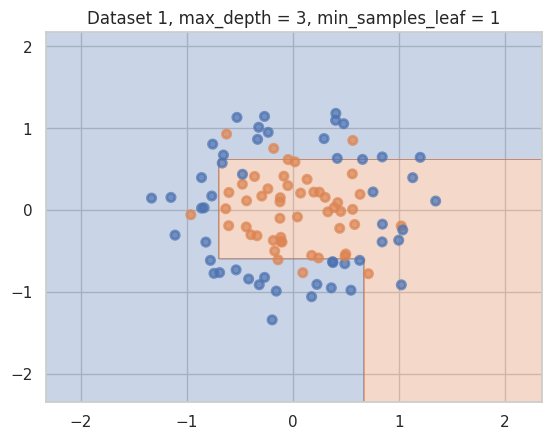

Dataset 1:
max_depth = 3, min_samples_leaf = 5
Train accuracy: 0.863
Test accuracy: 0.750


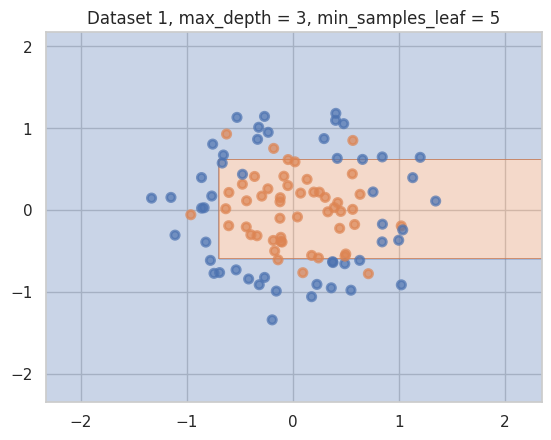

Dataset 1:
max_depth = 3, min_samples_leaf = 10
Train accuracy: 0.825
Test accuracy: 0.800


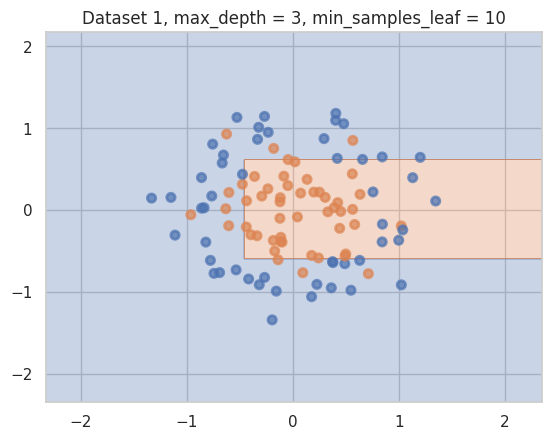

Dataset 1:
max_depth = 5, min_samples_leaf = 1
Train accuracy: 0.975
Test accuracy: 0.750


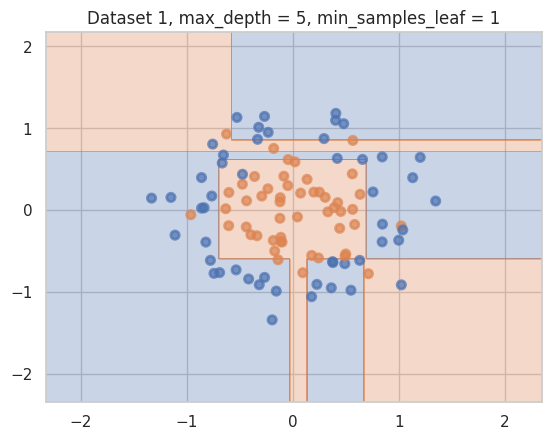

Dataset 1:
max_depth = 5, min_samples_leaf = 5
Train accuracy: 0.912
Test accuracy: 0.850


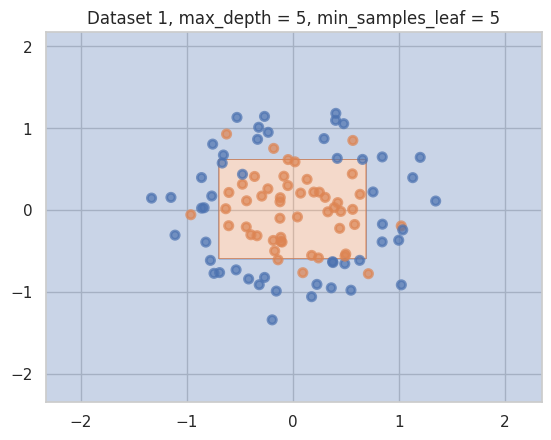

Dataset 1:
max_depth = 5, min_samples_leaf = 10
Train accuracy: 0.825
Test accuracy: 0.900


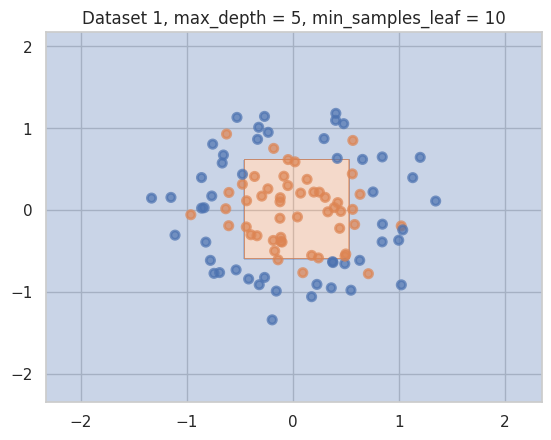

Dataset 1:
max_depth = 10, min_samples_leaf = 1
Train accuracy: 1.000
Test accuracy: 0.700


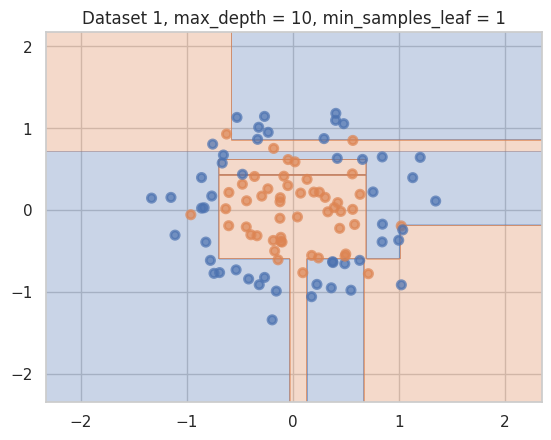

Dataset 1:
max_depth = 10, min_samples_leaf = 5
Train accuracy: 0.912
Test accuracy: 0.850


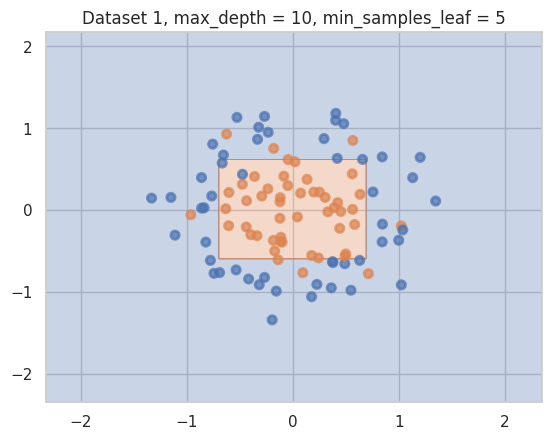

Dataset 1:
max_depth = 10, min_samples_leaf = 10
Train accuracy: 0.825
Test accuracy: 0.900


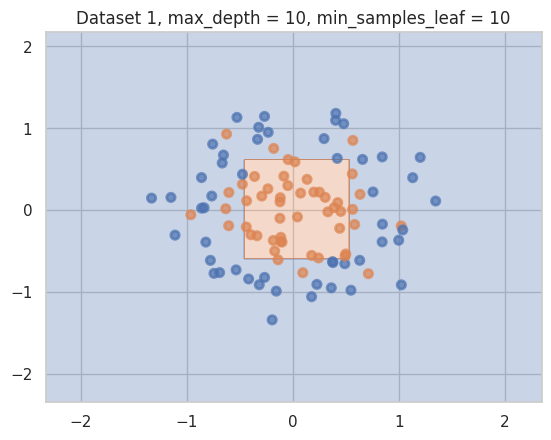

Dataset 2:
max_depth = 3, min_samples_leaf = 1
Train accuracy: 0.912
Test accuracy: 1.000


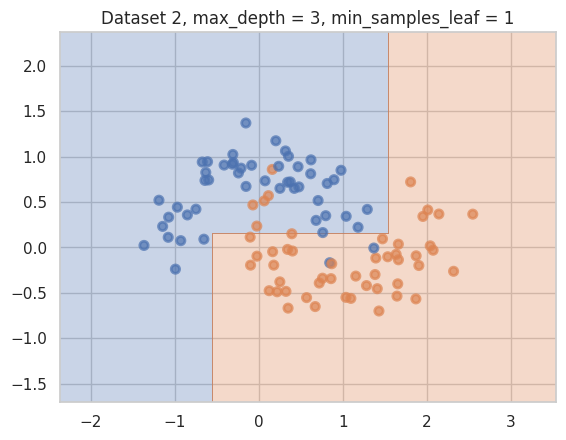

Dataset 2:
max_depth = 3, min_samples_leaf = 5
Train accuracy: 0.887
Test accuracy: 0.850


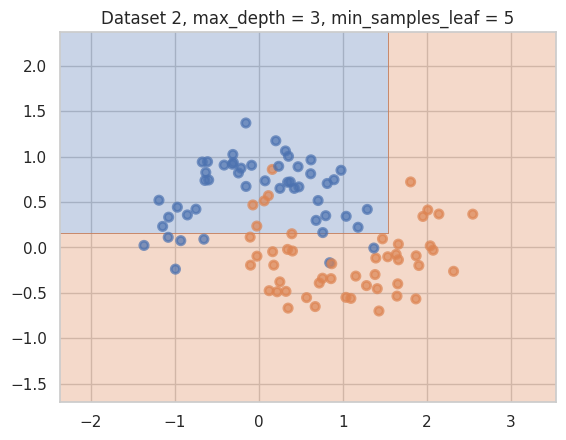

Dataset 2:
max_depth = 3, min_samples_leaf = 10
Train accuracy: 0.838
Test accuracy: 0.850


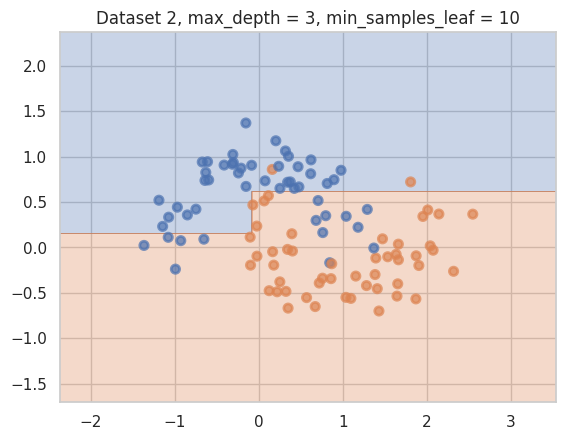

Dataset 2:
max_depth = 5, min_samples_leaf = 1
Train accuracy: 0.988
Test accuracy: 0.950


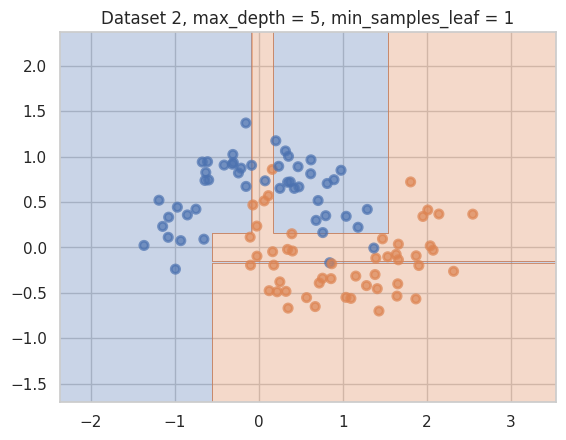

Dataset 2:
max_depth = 5, min_samples_leaf = 5
Train accuracy: 0.950
Test accuracy: 0.800


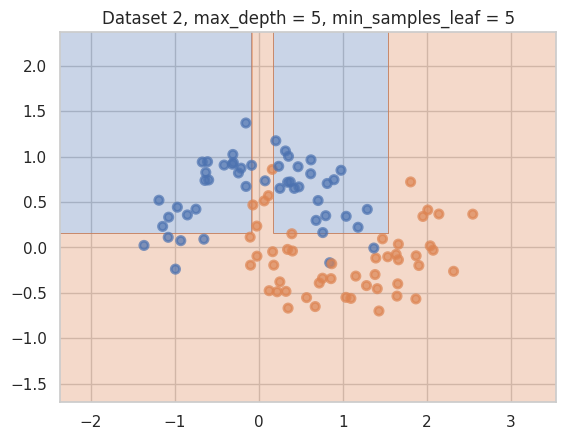

Dataset 2:
max_depth = 5, min_samples_leaf = 10
Train accuracy: 0.838
Test accuracy: 0.850


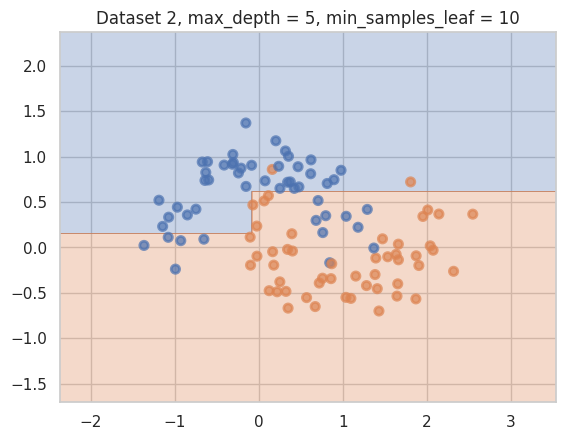

Dataset 2:
max_depth = 10, min_samples_leaf = 1
Train accuracy: 1.000
Test accuracy: 0.950


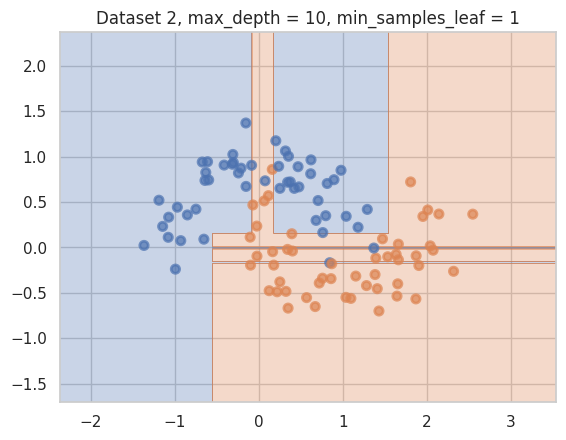

Dataset 2:
max_depth = 10, min_samples_leaf = 5
Train accuracy: 0.950
Test accuracy: 0.800


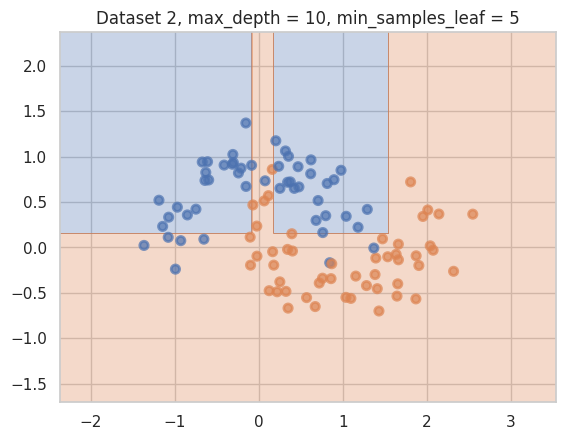

Dataset 2:
max_depth = 10, min_samples_leaf = 10
Train accuracy: 0.838
Test accuracy: 0.850


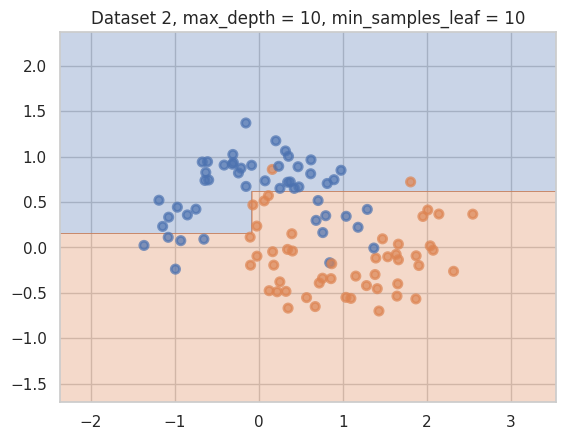

Dataset 3:
max_depth = 3, min_samples_leaf = 1
Train accuracy: 0.900
Test accuracy: 0.750


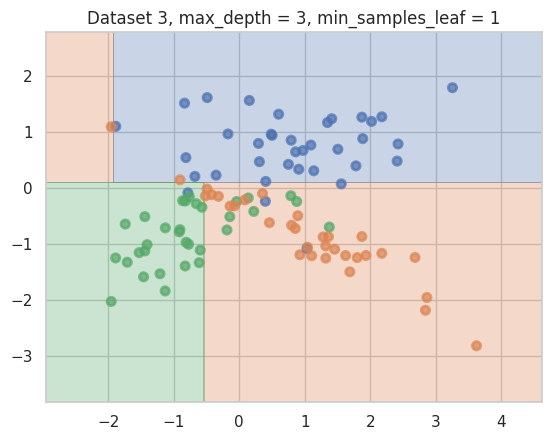

Dataset 3:
max_depth = 3, min_samples_leaf = 5
Train accuracy: 0.887
Test accuracy: 0.750


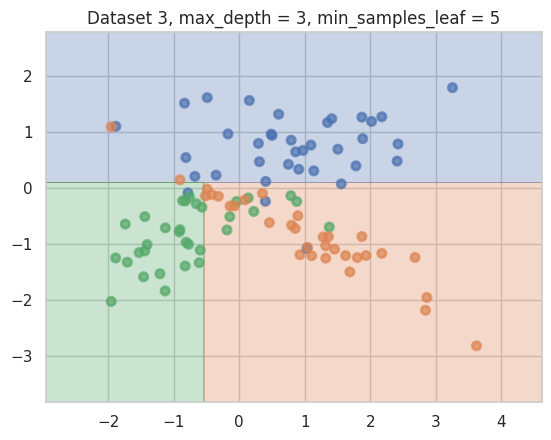

Dataset 3:
max_depth = 3, min_samples_leaf = 10
Train accuracy: 0.887
Test accuracy: 0.750


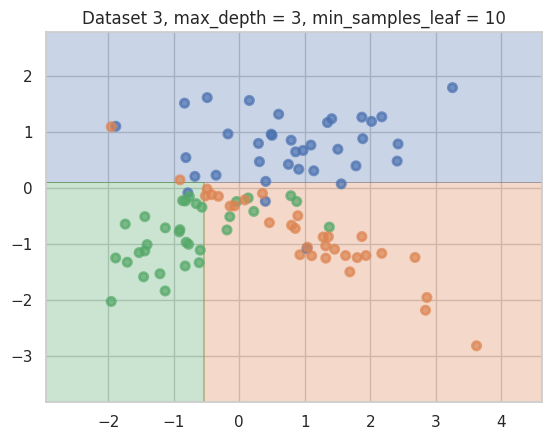

Dataset 3:
max_depth = 5, min_samples_leaf = 1
Train accuracy: 0.938
Test accuracy: 0.700


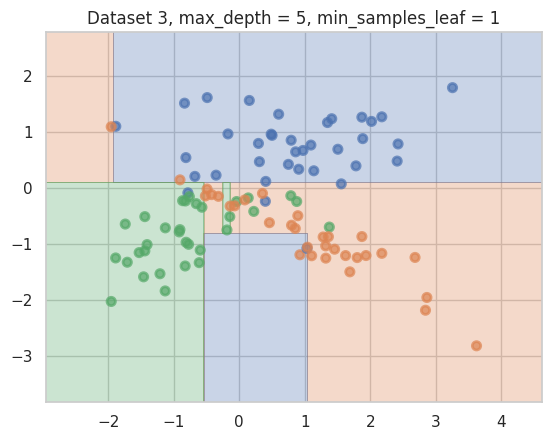

Dataset 3:
max_depth = 5, min_samples_leaf = 5
Train accuracy: 0.900
Test accuracy: 0.700


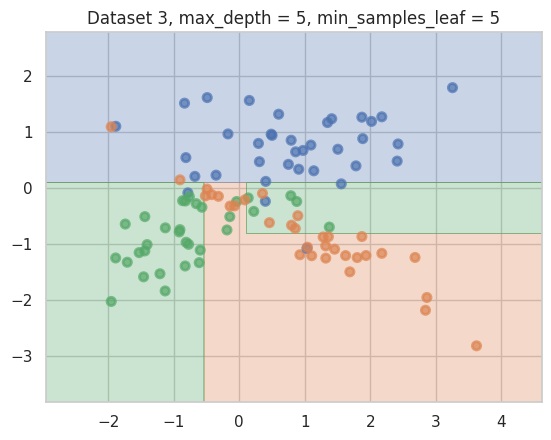

Dataset 3:
max_depth = 5, min_samples_leaf = 10
Train accuracy: 0.887
Test accuracy: 0.750


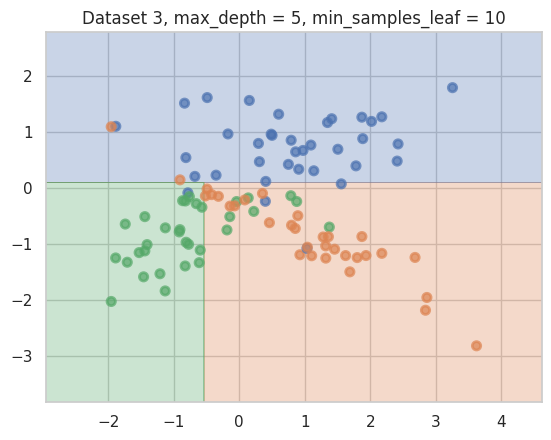

Dataset 3:
max_depth = 10, min_samples_leaf = 1
Train accuracy: 1.000
Test accuracy: 0.700


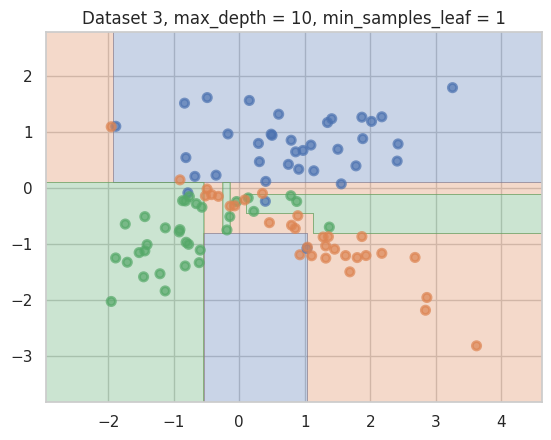

Dataset 3:
max_depth = 10, min_samples_leaf = 5
Train accuracy: 0.900
Test accuracy: 0.700


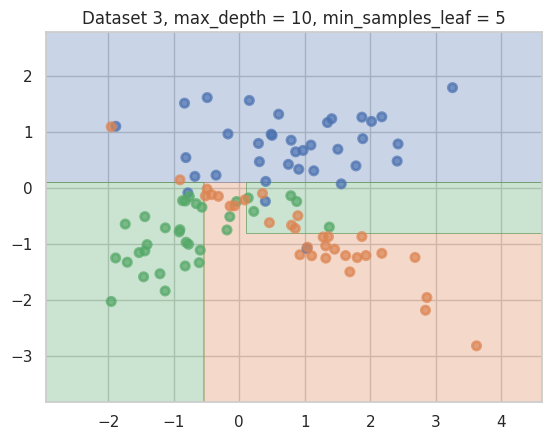

Dataset 3:
max_depth = 10, min_samples_leaf = 10
Train accuracy: 0.887
Test accuracy: 0.750


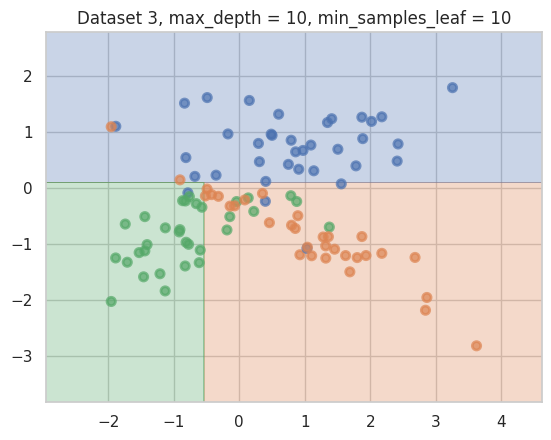

In [8]:
for i, (X, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    for max_depth in [3, 5, 10]:
        for min_samples_leaf in [1, 5, 10]:
            tree = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            tree.fit(X_train, y_train)
            y_pred_train = tree.predict(X_train)
            y_pred_test = tree.predict(X_test)
            train_accuracy = accuracy_score(y_train, y_pred_train)
            test_accuracy = accuracy_score(y_test, y_pred_test)
            print(f"Dataset {i+1}:")
            print(f"max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}")
            print(f"Train accuracy: {train_accuracy:.3f}")
            print(f"Test accuracy: {test_accuracy:.3f}")
            plot_surface(tree, X, y)
            plt.title(f"Dataset {i+1}, max_depth = {max_depth}, min_samples_leaf = {min_samples_leaf}")
            plt.show()


__Ответ:__ Удалось улучшить обобщающую способность деревьев на всех датасетах. Низкое значение max_depth и высокое значение min_samples_leaf позволяют избежать переобучения и получить более выраженные области классов

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

In [9]:
def find_best_split(feature_vector, target_vector):
    """
    Находит оптимальный порог для разбиения вектора признака по критерию Джини.

    Критерий Джини определяется следующим образом:
    .. math::
        Q(R) = -\\frac {|R_l|}{|R|}H(R_l) -\\frac {|R_r|}{|R|}H(R_r),

    где:
    * :math:`R` — множество всех объектов,
    * :math:`R_l` и :math:`R_r` — объекты, попавшие в левое и правое поддерево соответственно.

    Функция энтропии :math:`H(R)`:
    .. math::
        H(R) = 1 - p_1^2 - p_0^2,

    где:
    * :math:`p_1` и :math:`p_0` — доля объектов класса 1 и 0 соответственно.

    Указания:
    - Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    - В качестве порогов, нужно брать среднее двух соседних (при сортировке) значений признака.
    - Поведение функции в случае константного признака может быть любым.
    - При одинаковых приростах Джини нужно выбирать минимальный сплит.
    - Для оптимизации рекомендуется использовать векторизацию вместо циклов.

    Parameters
    ----------
    feature_vector : np.ndarray
        Вектор вещественнозначных значений признака.
    target_vector : np.ndarray
        Вектор классов объектов (0 или 1), длина `feature_vector` равна длине `target_vector`.

    Returns
    -------
    thresholds : np.ndarray
        Отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно разделить на
        два различных поддерева.
    ginis : np.ndarray
        Вектор со значениями критерия Джини для каждого порога в `thresholds`.
    threshold_best : float
        Оптимальный порог для разбиения.
    gini_best : float
        Оптимальное значение критерия Джини.

    """
    if len(feature_vector) <= 1:
        return np.array([]), np.array([]), None, None

    sorted_indices = np.argsort(feature_vector)
    feature_vector_sorted = feature_vector[sorted_indices]
    target_vector_sorted = target_vector[sorted_indices]

    unique_values = np.unique(feature_vector_sorted)
    if len(unique_values) <= 1:
        return np.array([]), np.array([]), None, None
    thresholds = (unique_values[1:] + unique_values[:-1]) / 2

    ginis = np.zeros(len(thresholds))
    for i, threshold in enumerate(thresholds):
        left_indices = feature_vector_sorted <= threshold
        right_indices = feature_vector_sorted > threshold

        if np.sum(left_indices) == 0 or np.sum(right_indices) == 0:
            continue

        left_target = target_vector_sorted[left_indices]
        right_target = target_vector_sorted[right_indices]

        p_left_1 = np.sum(left_target == 1) / len(left_target)
        p_left_0 = np.sum(left_target == 0) / len(left_target)

        p_right_1 = np.sum(right_target == 1) / len(right_target)
        p_right_0 = np.sum(right_target == 0) / len(right_target)

        gini_left = 1 - p_left_1**2 - p_left_0**2
        gini_right = 1 - p_right_1**2 - p_right_0**2

        ginis[i] = - (len(left_target) / len(target_vector_sorted)) * gini_left \
                   - (len(right_target) / len(target_vector_sorted)) * gini_right

    if len(ginis) == 0:
        return np.array([]), np.array([]), None, None

    gini_best = np.max(ginis)
    threshold_best = thresholds[np.argmax(ginis)]

    return thresholds, ginis, threshold_best, gini_best


__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

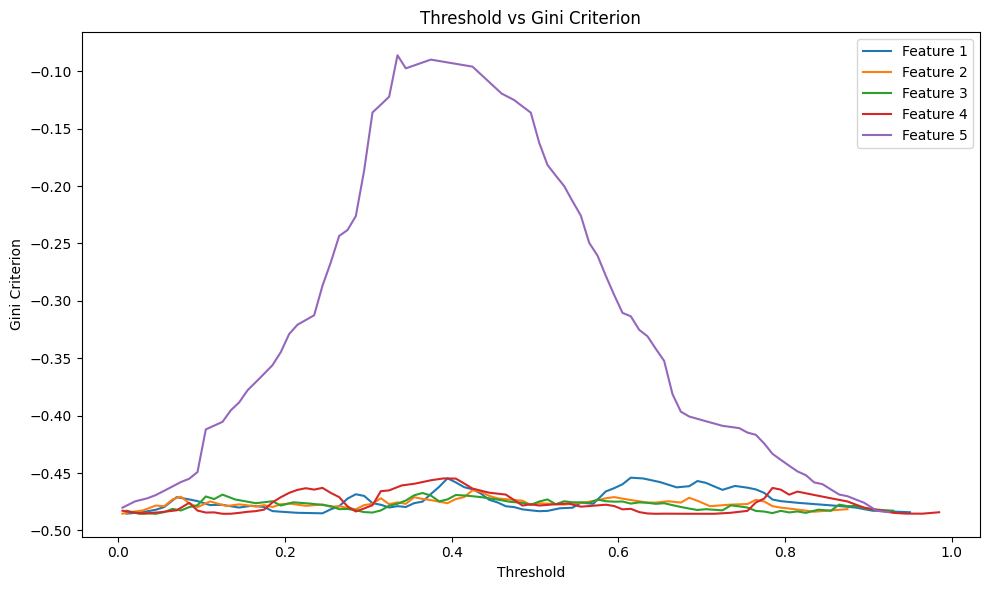

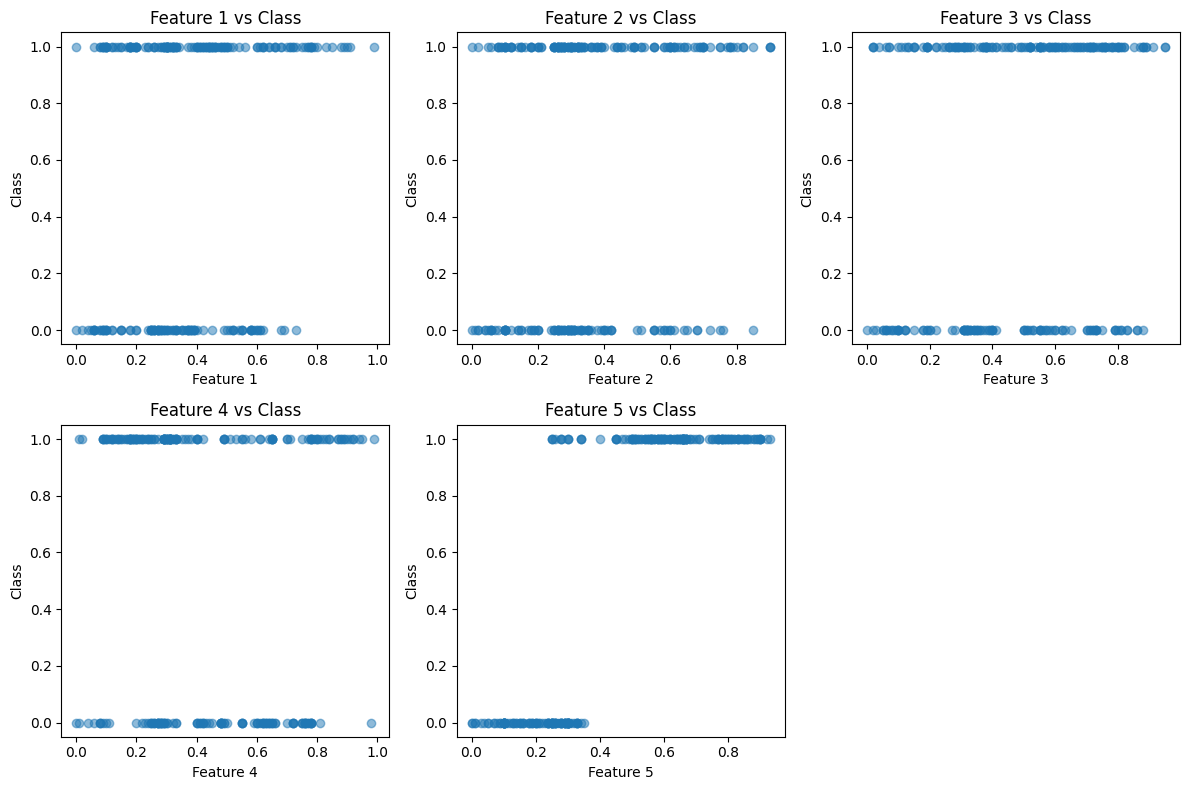

In [ ]:
data = pd.read_csv('students.csv')

X = data.iloc[:, :5].values
y = data.iloc[:, 5].values

# Построение графиков "порог — значение критерия Джини"
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(5):
    thresholds, ginis, _, _ = find_best_split(X[:, i], y)
    ax.plot(thresholds, ginis, label=f'Feature {i+1}')
ax.set_xlabel('Threshold')
ax.set_ylabel('Gini Criterion')
ax.set_title('Threshold vs Gini Criterion')
ax.legend()
plt.tight_layout()
plt.show()

# Построение scatter-графиков "значение признака — класс"
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
for i in range(5):
    ax = axes[i // 3, i % 3]
    ax.scatter(X[:, i], y, alpha=0.5)
    ax.set_xlabel(f'Feature {i+1}')
    ax.set_ylabel('Class')
    ax.set_title(f'Feature {i+1} vs Class')
axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** Следует выбрать признак 5, так как его кривая, достигает максимального значения критерия около порога 0.4.
На остальных признаках критерий Джини достигает меньших значений.
Это подтверждается и scatter-графиками, разделение по 5 признаку наиболее явно и пороговое значение примерно соответствует 0.4.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




In [ ]:
from collections import Counter

class DecisionTree:
    def __init__(
        self,
        feature_types,
        max_depth=None,
        min_samples_split=None,
        min_samples_leaf=None,
    ):
        if any(ft not in {"real", "categorical"} for ft in feature_types):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def get_params(self, deep=True):
      return {
            "feature_types": self._feature_types,
            "max_depth": self._max_depth,
            "min_samples_split": self._min_samples_split,
            "min_samples_leaf": self._min_samples_leaf,
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, "_" + parameter, value)
        return self

    def _fit_node(self, sub_X, sub_y, node):
        """
        Обучение узла дерева решений.

        Если все элементы в подвыборке принадлежат одному классу, узел становится терминальным.

        Parameters
        ----------
        sub_X : np.ndarray
            Подвыборка признаков.
        sub_y : np.ndarray
            Подвыборка меток классов.
        node : dict
            Узел дерева, который будет заполнен информацией о разбиении.

        """
        if np.all(sub_y == sub_y[0]) or len(sub_y) < 2:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None

        for feature in range(sub_X.shape[1]):
            feature_type = self._feature_types[feature]

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {
                    key: clicks.get(key, 0) / count for key, count in counts.items()
                }
                sorted_categories = sorted(ratio, key=ratio.get)
                categories_map = {
                    category: i for i, category in enumerate(sorted_categories)
                }
                feature_vector = np.vectorize(categories_map.get)(sub_X[:, feature])
            else:
                raise ValueError("Некорректный тип признака")

            if len(np.unique(feature_vector)) <= 1:
                continue

            _, _, threshold, gini = find_best_split(feature_vector, sub_y)

            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini
                split = feature_vector < threshold

                if feature_type == "real":
                    threshold_best = threshold
                elif feature_type == "categorical":
                    threshold_best = [
                        k for k, v in categories_map.items() if v < threshold
                    ]

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"
        node["feature_split"] = feature_best

        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError("Некорректный тип признака")

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[~split], sub_y[~split], node["right_child"])

    def _predict_node(self, x, node):
        """
        Рекурсивное предсказание класса для одного объекта по узлу дерева решений.

        Если узел терминальный, возвращается предсказанный класс.
        Если узел не терминальный, выборка передается в соответствующее поддерево для дальнейшего предсказания.

        Parameters
        ----------
        x : np.ndarray
            Вектор признаков одного объекта.
        node : dict
            Узел дерева решений.

        Returns
        -------
        int
            Предсказанный класс объекта.
        """
        if node["type"] == "terminal":
            return node["class"]

        feature_split = node["feature_split"]
        if self._feature_types[feature_split] == "real":
            if x[feature_split] < node["threshold"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])
        elif self._feature_types[feature_split] == "categorical":
            if x[feature_split] in node["categories_split"]:
                return self._predict_node(x, node["left_child"])
            else:
                return self._predict_node(x, node["right_child"])

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)


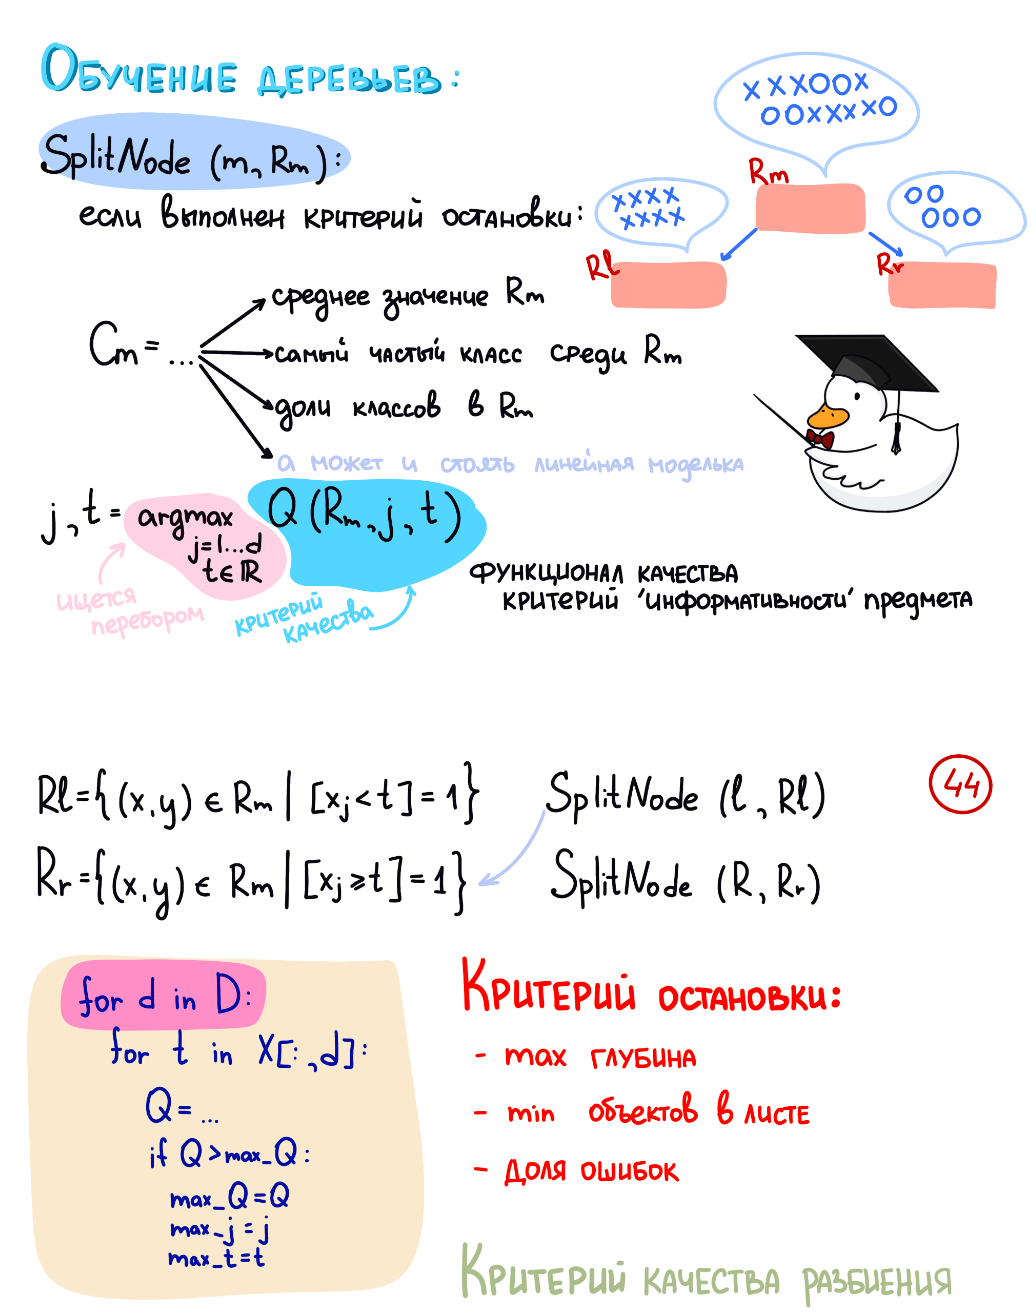

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [ ]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('agaricus-lepiota.data', header=None)

for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


feature_types = ['categorical'] * X_train.shape[1]
dt = DecisionTree(feature_types)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

tic-tac-toe недоступен

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

datasets = {
    'mushrooms': 'agaricus-lepiota.data',
    'cars': 'car.data',
    'nursery': 'nursery.data'
}

results = pd.DataFrame(columns=['DecisionTree (real)', 'DecisionTree (categorical)', 'DecisionTree (one-hot)', 'DecisionTreeClassifier (sklearn)'])

for dataset_name, dataset_path in datasets.items():
    if dataset_name == 'mushrooms':
        data = pd.read_csv(dataset_path)
        X, y = data.iloc[:, 1:], data.iloc[:, 0]
    elif dataset_name == 'cars':
        data = pd.read_csv(dataset_path, header=None)
        X, y = data.iloc[:, :-1], data.iloc[:, -1]
        y = (y.isin(['good', 'vgood'])).astype(int)
    elif dataset_name == 'nursery':
        data = pd.read_csv(dataset_path)
        X, y = data.iloc[:, :-1], data.iloc[:, -1]
        y = (y.isin(['very_recom', 'priority', 'spec_prior'])).astype(int)

    X_encoded = X.apply(LabelEncoder().fit_transform)

    # DecisionTree (real)
    dt_real = DecisionTree(feature_types=['real'] * X_encoded.shape[1])
    accuracy_real = cross_val_score(dt_real, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()

    # DecisionTree (categorical)
    dt_cat = DecisionTree(feature_types=['categorical'] * X_encoded.shape[1])
    accuracy_cat = cross_val_score(dt_cat, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()

    # DecisionTree (one-hot)
    onehot_encoder = OneHotEncoder(sparse=False)
    X_onehot = onehot_encoder.fit_transform(X_encoded)
    dt_onehot = DecisionTree(feature_types=['real'] * X_onehot.shape[1])
    accuracy_onehot = cross_val_score(dt_onehot, X_onehot, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()

    # DecisionTreeClassifier (sklearn)
    dt_sklearn = DecisionTreeClassifier()
    accuracy_sklearn = cross_val_score(dt_sklearn, X_encoded.values, y.values, cv=10, scoring=make_scorer(accuracy_score)).mean()

    # Сохранение результатов
    results.loc[dataset_name] = [accuracy_real, accuracy_cat, accuracy_onehot, accuracy_sklearn]

print(results)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


           DecisionTree (real)  DecisionTree (categorical)  \
mushrooms             0.994458                    0.993351   
cars                  0.942647                    0.967546   
nursery               0.999846                    0.999923   

           DecisionTree (one-hot)  DecisionTreeClassifier (sklearn)  
mushrooms                0.994090                          0.962723  
cars                     0.919495                          0.942707  
nursery                  0.999769                          0.999846  


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


1. **mushrooms**:
   - DecisionTree (real) и DecisionTree (categorical) показывают очень высокую точность (около 99.4% и 99.3% соответственно).
   - DecisionTree (one-hot) также показывает высокую точность (99.4%).
   - DecisionTreeClassifier (sklearn) показывает немного меньшую точность (96.2%) по сравнению с другими алгоритмами.

2. **cars**:
   - DecisionTree (categorical) показывает наилучшую точность (96.7%).
   - DecisionTree (real) и DecisionTreeClassifier (sklearn) показывают схожую точность (94.2% и 94.3% соответственно).
   - DecisionTree (one-hot) показывает наименьшую точность (91.9%).

3. **nursery**:
   - Все алгоритмы показывают очень высокую точность

Выводы:
- DecisionTree (categorical) показывает наилучшую или близкую к наилучшей точность на всех наборах данных. Это связано с тем, что эти наборы данных содержат в основном категориальные признаки.
- DecisionTree (real) и DecisionTreeClassifier (sklearn) показывают схожую производительность на большинстве наборов данных.
- DecisionTree (one-hot) показывает высокую точность на наборах данных mushrooms и nursery, но несколько уступает на наборе данных cars.

Эти результаты показывают, что выбор подходящего алгоритма и представления признаков может зависеть от конкретного набора данных и его характеристик.


# Как дела?

In [ ]:
### ╰( ͡☉ ͜ʖ ͡☉ )つ──☆*:・ﾟ   ฅ^•ﻌ•^ฅ   ʕ•ᴥ•ʔ